# Regresja

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')
from sklearn.neural_network import MLPRegressor

Rozważmy zbiór Boston

In [2]:
boston = datasets.load_boston()
# print description
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
# get the data
boston_X = boston.data
boston_Y = boston.target

Podzielmy zbiór na część testową i treningową .

In [4]:
# Split the data into training/testing sets - dzielę zbiór na dane treningowe i testowe
boston_X_train = boston_X[:-50]
boston_X_test = boston_X[-50:]
 
# Split the targets into training/testing sets
boston_y_train = boston_Y[:-50]
boston_y_test = boston_Y[-50:]

In [5]:
X=boston_X_train
y=boston_y_train

# Zadanie
Znajdż najleprzy model dzieląc na zbiór testowy i terningowy.


In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn import model_selection

seed=123
kfold = model_selection.KFold(n_splits=5, random_state=seed)


In [7]:
grid_1 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), ElasticNet(alpha=1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'elasticnet__alpha': [0.01, 0.1, 1, 10]},
                    cv=kfold,
                    refit=True)
grid_1.fit(X, y)
grid_1.best_params_

{'elasticnet__alpha': 1, 'polynomialfeatures__degree': 1}

In [8]:
grid_1.cv_results_['mean_test_score'].reshape(4, -1)

array([[ 1.58100523e-01, -1.81557121e+02, -1.25548241e+03,
        -2.93955525e+04],
       [ 4.15342827e-01, -9.48480026e-01, -5.55987741e+02,
        -3.23053009e+05],
       [ 4.70898357e-01,  1.10322554e-01, -8.85392282e+01,
        -8.76799455e+03],
       [ 2.14286414e-01,  1.89988997e-01, -9.81903428e-01,
        -1.08753157e+03]])

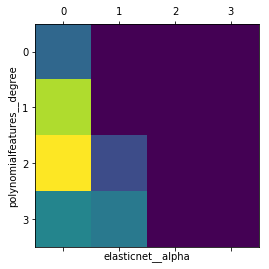

In [9]:
plt.matshow(grid_1.cv_results_['mean_test_score'].reshape(4, -1),
vmin=0, cmap="viridis")
plt.xlabel("elasticnet__alpha")
plt.ylabel("polynomialfeatures__degree")
plt.show()
# chcemy mieć żółte w środku, dookoła filoetowe

In [10]:
grid_2 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'lasso__alpha': [0.01, 0.1, 1, 10]},
                    cv=kfold,
                    refit=True)
grid_2.fit(X, y)
grid_2.best_params_

{'lasso__alpha': 1, 'polynomialfeatures__degree': 1}

In [11]:
grid_3 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'ridge__alpha': [0.01, 0.1, 1, 10]},
                    cv=kfold,
                    refit=True)
grid_3.fit(X, y)
grid_3.best_params_

{'polynomialfeatures__degree': 1, 'ridge__alpha': 10}

In [12]:
grid_4 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],

                               },
                    cv=kfold,
                    refit=True)
grid_4.fit(X, y)
grid_4.best_params_

{'polynomialfeatures__degree': 1}

In [13]:
grid_5 = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=kfold,
                   param_grid={"C": [1e0, 1e3, 1e6],  #1e7 = 10^7, jak wychodzi graniczne C to zwiększamy
                               "gamma": [0.0000001, 0.001]}) # rowniez jak wychodzi graniczne to zmieniamy

grid_5.fit(X, y)
grid_5.best_params_

{'C': 1000000.0, 'gamma': 1e-07}

In [14]:
param_grid = {
    'n_estimators': [100, 200, 700],
    'max_features': ['auto', 'sqrt', 'log2'],   #stały zestaw
}

rfc = RandomForestRegressor(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True ) 
grid_6 = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= kfold, refit=True)
grid_6.fit(X,y)
grid_6.best_params_

{'max_features': 'auto', 'n_estimators': 100}

In [17]:
grid_7 = GridSearchCV(MLPRegressor(hidden_layer_sizes=(100,100,100),activation='tanh',alpha=0.0001),#model powinien byc zainicjalizowany
                    param_grid={'hidden_layer_sizes': [(10,10),(10,10),(100,100)],
                                'alpha': [1, 100 ,1000],
                               'activation': ['identity', 'logistic', 'tanh', 'relu']                               
                               },#parametry do podstawienia
                    cv=5,#na ile czesci ma dzielic zbior
                    n_jobs=1,
                    refit=True)
grid_7.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [(10, 10), (10, 10), (100, 100)], 'alpha': [1, 100, 1000], 'activation': ['identity', 'logistic', 'tanh', 'relu']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [18]:
from sklearn import  metrics

X_test=boston_X_test
y_test=boston_y_test

models = []
models.append(('ElasticNet', grid_1.best_estimator_))
models.append(('Lasso', grid_2.best_estimator_))
models.append(('Ridge', grid_3.best_estimator_))
models.append(('LR', grid_4.best_estimator_))
# dodajemy SVR
models.append(('SVR', grid_5.best_estimator_))
# dodajemy Random Forest
models.append(('RFC', grid_6.best_estimator_))
models.append(('MLPRegressor', grid_7.best_estimator_))

r2 = []
explained_variance_score = []
median_absolute_error = []
mean_squared_error = []
mean_absolute_error = []
for name, model in models:
    print(name)
    print("R^2: {}".format(metrics.r2_score(y_test, model.predict(X_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model.predict(X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model.predict(X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model.predict(X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model.predict(X_test)) ))
    r2.append(metrics.r2_score(y_test, model.predict(X_test)))
    explained_variance_score.append(metrics.explained_variance_score(y_test, model.predict(X_test)))
    median_absolute_error.append( metrics.median_absolute_error(y_test, model.predict(X_test)))
    mean_squared_error.append(metrics.mean_squared_error(y_test, model.predict(X_test)))
    mean_absolute_error.append(metrics.mean_absolute_error(y_test, model.predict(X_test)))

ElasticNet
R^2: 0.26193334547185143
Explained variance score: 0.2623757558442531
Median absolute error: 2.037245534344782
Mean squared error: 13.922077497699014
Mean absolute errors: 2.785642785357498
Lasso
R^2: 0.29440447697219996
Explained variance score: 0.2945064924302251
Median absolute error: 1.9366088693450312
Mean squared error: 13.309577791321091
Mean absolute errors: 2.7134048268195317
Ridge
R^2: 0.32486498478090775
Explained variance score: 0.3262123226195065
Median absolute error: 2.1468118841963175
Mean squared error: 12.735004278576216
Mean absolute errors: 2.741003205128658
LR
R^2: 0.41861839023791136
Explained variance score: 0.42151869035623146
Median absolute error: 2.09442119390836
Mean squared error: 10.966543166781303
Mean absolute errors: 2.5388524136965507
SVR
R^2: 0.4796486308166902
Explained variance score: 0.5033492935444495
Median absolute error: 1.9944605563068754
Mean squared error: 9.815335841767856
Mean absolute errors: 2.359226318393827
RFC
R^2: 0.233510

In [19]:
import pandas as pd
d = {'r2': r2, 
     'explained_variance_score': explained_variance_score, 
     'median_absolute_error': median_absolute_error,
     'mean_squared_error' : mean_squared_error,
     'mean_absolute_error' : mean_absolute_error,
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['ElasticNet','Lasso','Ridge','LR', 'RFC', 'MLPRegressor'])
df
# porównanie 4 metod, wybieramy ten gdzie R2 wyszło największe -> LinearRegression

ValueError: Length of values does not match length of index

In [20]:
import pandas as pd
d = {'r2': r2, 
     'explained_variance_score': explained_variance_score, 
     'median_absolute_error': median_absolute_error,
     'mean_squared_error' : mean_squared_error,
     'mean_absolute_error' : mean_absolute_error,
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['ElasticNet','Lasso','Ridge','LR', 'SVR', 'RFC', 'MLPRegressor'])
df
# dodajemy metodę SVR
# porównanie 4 metod, wybieramy ten gdzie R2 wyszło największe -> LinearRegression

Method        r2  explained_variance_score  median_absolute_error  \
0    ElasticNet  0.261933                  0.262376               2.037246   
1         Lasso  0.294404                  0.294506               1.936609   
2         Ridge  0.324865                  0.326212               2.146812   
3            LR  0.418618                  0.421519               2.094421   
4           SVR  0.479649                  0.503349               1.994461   
5           RFC  0.233510                  0.254529               2.071000   
6  MLPRegressor -0.176728                 -0.072613               3.279387   

   mean_squared_error  mean_absolute_error  
0           13.922077             2.785643  
1           13.309578             2.713405  
2           12.735004             2.741003  
3           10.966543             2.538852  
4            9.815336             2.359226  
5           14.458223             2.817260  
6           22.196502             3.582026